In [10]:
# Librerias
import cv2  # Importa la biblioteca OpenCV para procesamiento de imágenes y visión por computadora
from google.colab import files  # Importa la función 'files' de la biblioteca de Google Colab para cargar archivos
from IPython.display import Image, display  # Importa las clases 'Image' y 'display' de IPython.display para mostrar imágenes en el entorno de IPython

In [11]:
# Paso 1: Subir una imagen desde el sistema local (en Google Colab)
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Obtener la ruta de la imagen subida

Saving CR7.jpg to CR7 (2).jpg


In [12]:
# Paso 2: Leer la imagen usando OpenCV
image = cv2.imread(image_path)

In [13]:
# Paso 3: Convertir la imagen a escala de grises (para la detección de caras)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
# Paso 4: Descargar el archivo XML del clasificador Haar para detección de caras
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2024-07-24 17:49:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.2’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

2024-07-24 17:49:38 (11.6 MB/s) - ‘haarcascade_frontalface_default.xml.2’ saved [930127/930127]



In [15]:
# Paso 5: Crear un clasificador de cascada de Haar para la detección de caras
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [16]:
# Paso 6: Detectar caras en la imagen
# scaleFactor: factor de escala para la imagen reducida
# minNeighbors: número mínimo de vecinos requeridos para cada rectángulo candidato
# minSize: tamaño mínimo de la ventana de detección
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [17]:
# Paso 7: Dibujar rectángulos alrededor de las caras detectadas en la imagen original
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [18]:
# Paso 8: Guardar la imagen con los rectángulos dibujados
cv2.imwrite('faces_detected.jpg', image)

True

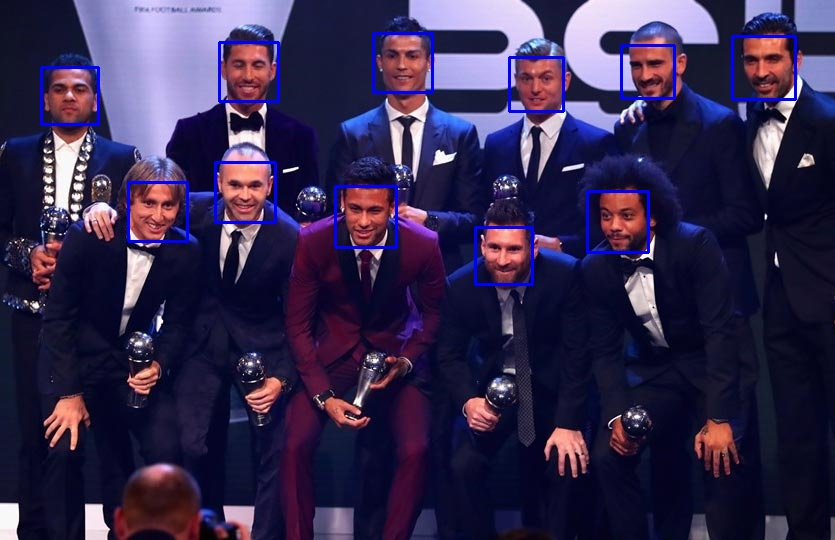

In [19]:
# Paso 9: Mostrar la imagen con los rectángulos dibujados
display(Image('faces_detected.jpg'))

In [20]:
# Paso 10: Imprimir el número de caras detectadas
print(f'Se detectaron {len(faces)} cara(s) en la imagen.')

Se detectaron 11 cara(s) en la imagen.


En este ejemplo, primero cargamos una imagen desde nuestro sistema local a Google Colab. Luego, convertimos la imagen a escala de grises y utilizamos el modelo Haar Cascade *para* detectar rostros en la imagen. Finalmente, dibujamos rectángulos alrededor de los rostros detectados y mostramos la imagen resultante con los rostros destacados.

Recuerda que este ejemplo utiliza un modelo Haar Cascade preentrenado, que es una técnica básica para la detección de rostros.